In [13]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.regularizers import l2

In [3]:
train_datagen= ImageDataGenerator(rescale= 1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

In [6]:
train_generator= train_datagen.flow_from_directory(
    'emotion_dataset/train',
    target_size= (48,48),
    batch_size= 64,
    color_mode='grayscale'
    ,class_mode= 'categorical'
)


Found 29662 images belonging to 7 classes.


In [7]:
val_generator= val_datagen.flow_from_directory(
    'emotion_dataset/test'
    ,target_size =(48,48)
    ,batch_size= 64,
    color_mode= 'grayscale'
    ,class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [8]:
from collections import Counter

class_counts = Counter(train_generator.classes)


class_labels = train_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Training Data Class Count:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

Training Data Class Count:

angry: 3995 images
disgusted: 1389 images
fearful: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprised: 3171 images


In [9]:
class_counts = Counter(val_generator.classes)


class_labels = val_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Validation Data Class Counts:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

Validation Data Class Counts:

angry: 958 images
disgusted: 111 images
fearful: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprised: 831 images


In [22]:
model = Sequential()
model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation= 'softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 19, 19, 256)      

In [24]:
optimizer = keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(optimizer = optimizer , loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [25]:
history= model.fit(
    train_generator, 
    validation_data= val_generator, 
    shuffle= True,
    epochs= 15

    
)

Epoch 1/15
464/464 [==============================] - 265s 569ms/step - loss: 2.4709 - accuracy: 0.2350 - val_loss: 1.9989 - val_accuracy: 0.2471
Epoch 2/15
464/464 [==============================] - 20s 42ms/step - loss: 1.8726 - accuracy: 0.3000 - val_loss: 1.6363 - val_accuracy: 0.3969
Epoch 3/15
464/464 [==============================] - 20s 44ms/step - loss: 1.6383 - accuracy: 0.3937 - val_loss: 1.4892 - val_accuracy: 0.4480
Epoch 4/15
464/464 [==============================] - 21s 45ms/step - loss: 1.5306 - accuracy: 0.4339 - val_loss: 1.4149 - val_accuracy: 0.4765
Epoch 5/15
464/464 [==============================] - 22s 47ms/step - loss: 1.4580 - accuracy: 0.4633 - val_loss: 1.3755 - val_accuracy: 0.4971
Epoch 6/15
464/464 [==============================] - 22s 48ms/step - loss: 1.3964 - accuracy: 0.4894 - val_loss: 1.3116 - val_accuracy: 0.5180
Epoch 7/15
464/464 [==============================] - 23s 49ms/step - loss: 1.3544 - accuracy: 0.5064 - val_loss: 1.2882 - val_accurac

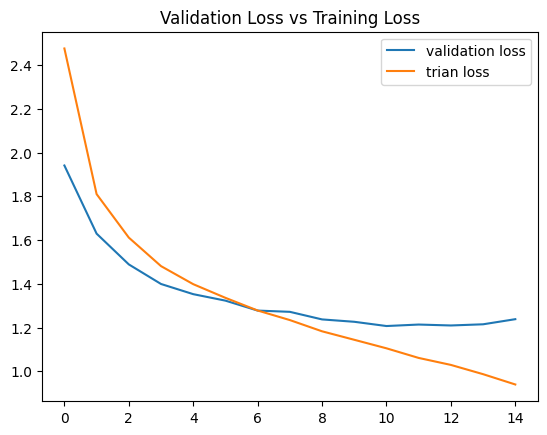

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label= 'validation loss')
plt.plot(history.history['loss'], label = 'trian loss')
plt.legend()
plt.title('Validation Loss vs Training Loss')
plt.show()

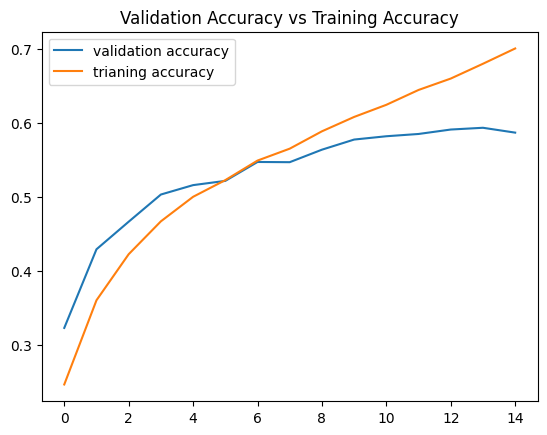

In [21]:
plt.plot(history.history['val_accuracy'],label= 'validation accuracy')
plt.plot(history.history['accuracy'], label = 'trianing accuracy')
plt.legend()
plt.title('Validation Accuracy vs Training Accuracy')
plt.show()